# Cryptocurrency Arbitrage

By arbitrage we find the errors in cryptocurrency pricing and use them in our benefit for investment. Here we are finding the prices of any crypto coin with their respective trading markets and visualising the error in prices so that we can take benefit

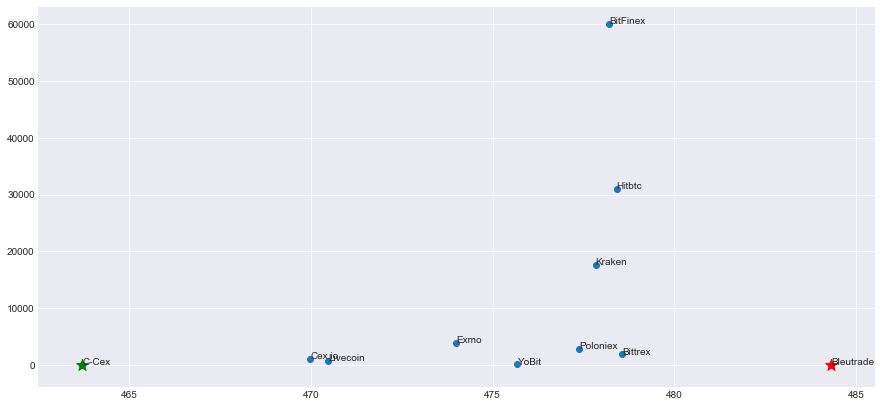

Minimum data of crypto
  market   price    volume
3  C-Cex  463.71  0.078319
Maximum data of crypto
      market   price    volume
2  Bleutrade  484.32  0.538421


In [135]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def get_crypto_arbitrage(coin_symb, comp_currency):
    url = "https://api.cryptonator.com/api/full/{}-{}".format(coin_symb.upper(), comp_currency.upper())
    page = requests.get(url)
    data = page.json()["ticker"]
    volume = data["volume"]
    markets = data["markets"]
    df_markets = pd.DataFrame(markets)
    df_markets["price"] = pd.to_numeric(df_markets.price) # converting the price from object data type to numeric type
    df_markets["volume"] = pd.to_numeric(df_markets.volume) # converting the volume from object data type to numeric type
    df_markets["price"] = round(df_markets["price"],2) # rounding the price values to 2 decimal places
    markets = df_markets["market"] # assigning the market pandas series to the markets variable
    
    x_values = df_markets["price"]
    y_values = df_markets["volume"]
    
    min_price = df_markets["price"].min()
    min_data = df_markets.loc[df_markets["price"] == min_price]
    
    max_price = df_markets["price"].max()
    max_data = df_markets.loc[df_markets["price"] == max_price]
    

    
    plt.figure(figsize=[15,7])
    for i, market in enumerate(markets):
        plt.annotate(market,xy=(x_values[i], y_values[i]))
    sns.set_style("darkgrid")
    plt.scatter(x=x_values,y=y_values)
    plt.scatter(x=min_data["price"],y=min_data["volume"],color="green",marker="*",s=150)
    plt.scatter(x=max_data["price"],y=max_data["volume"],color="red",marker="*",s=150)
    plt.show()
    print("Minimum data of crypto")
    print(min_data)
    print("Maximum data of crypto")
    print(max_data)

get_crypto_arbitrage('eth','usd')


As seen from the graph above with the green star on the left and red star on the right or the final output just above us we can see that we can purchase Ethereum coin for 463.71 dollars which is the cheapest value currently as compared to all the trading markets from C-Cex, the trading market of crypto currencies and sell it for 484.32 dollars which is the maximum value currently on Bleutrade trading market earning a 20.61 dollars straight profit per coin!.